#### Spam filter

In [62]:
import nltk

In [63]:
# nltk.download_shell()
# to download stopwords package

In [64]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [65]:
print(len(messages))

5574


In [66]:
messages[30]

"ham\tWait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

In [67]:
# print the first 10 msg

In [68]:
for msg_no,msg in enumerate(messages[:10]):
    print(msg_no,msg)
    print("\n")

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [69]:
# we see it is a tab separated file
# first column being the ham/spam and second 
# the actual msg

messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [70]:
# notice the \t of it

In [71]:
import pandas as pd

In [72]:
messages = pd.read_csv("smsspamcollection/SMSSpamCollection",sep='\t',
                      names=['label','message'])

In [73]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [75]:
# notice that total and unique msgs are different that makes
# sense because some msg are repeated like yes,no,sorry,i'll call later etc

In [76]:
# lets see what and how much spam and ham msgs are there

In [77]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [78]:
# see 747 spams are there and mostly used spam also illustrated
# similarly we have the count of ham and what is the most used ham msg

#### what features we could use here ?

- NLP is more about feature engineering
- the better your knowledge on data better your ability to engineer more feature from it

In [79]:
# lets add the msg length column to it

In [80]:
messages['length'] = messages['message'].apply(len)

In [81]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [82]:
# lets vizulalize the length of msg

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

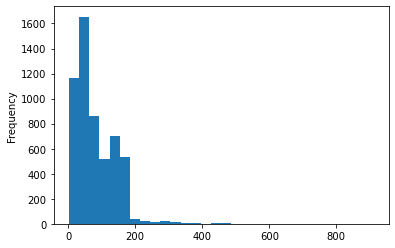

In [84]:
messages['length'].plot.hist(bins=30)

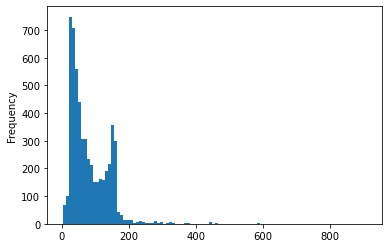

In [85]:
messages['length'].plot.hist(bins=100)

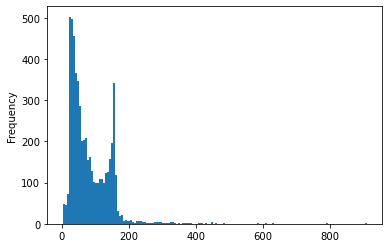

In [86]:
messages['length'].plot.hist(bins=150)

In [87]:
# see the double peaks etc 
# means text length could be one of our feature to consider

In [88]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [89]:
# lets see how does the max length msg looks like
# using pandas masking

In [90]:
messages[messages['length'] == 910]

,label,message,length
1085,ham,For me the love should start with attraction.i...,910


In [91]:
# notice that pandas doesn't show whole msg so
messages[messages['length'] == 910]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [92]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [93]:
# lets use the pandas built in facet grid kind of feature 
# to visulalize

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000158DCB4A1F0>,
      dtype=object)

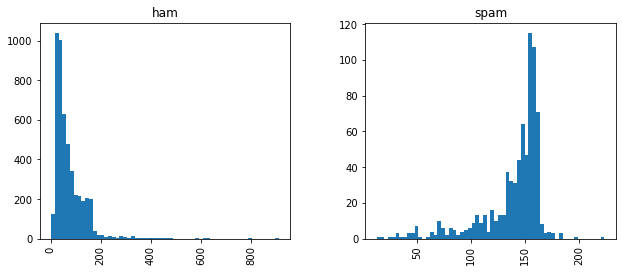

In [94]:
messages.hist(column='length',by='label',bins=60,figsize=(10,4))

In [95]:
# ham msgs are centered around 50 while the spam are somewhere around 150
# so length could be one of the feature to distinguish btwn spam and ham msgs

### Text-preporcessing

In [96]:
import string

In [97]:
mess = "Sample message! Notice: it has punctuation."

In [98]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [99]:
nopunc = [c for c in mess if c not in string.punctuation]

In [100]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [101]:
from nltk.corpus import stopwords

In [102]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [103]:
# all these are those words of english which doesn't actually
# tells you anything distinguishing features

In [104]:
# join the list of nopunc

In [105]:
nopunc = ''.join(nopunc)

In [106]:
nopunc

'Sample message Notice it has punctuation'

In [107]:
# bcz
# let
x = ['a','b','c']
x

['a', 'b', 'c']

In [108]:
''.join(x)

'abc'

In [109]:
'++'.join(x)     #notice its working

'a++b++c'

In [110]:
# insert the first string provided btwn each element


In [111]:
# now get the individual words from nopunc

In [112]:
nopunc

'Sample message Notice it has punctuation'

In [113]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [114]:
# that means we can use list comprehension to remove any stopwords

In [115]:
clean_mess = [w for w in nopunc.split() if w.lower() not in stopwords.words("english")]

In [116]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [117]:
# clean_mess = ''.join(clean_mess)

In [118]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

- do this for whole of our dataset messages

In [119]:
def text_preprocessing(msg):
    """
    1. remove punc
    2. remove stopword
    3. return list of clean text words
    """
    nopunc = [text for text in msg if text not in string.punctuation]
    nopunc = ''.join(nopunc)
#     make it a list again

    clean_msg = [w for w in nopunc.split() if w.lower() not in stopwords.words("english")]
    return clean_msg

In [120]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [121]:
messages['message'].apply(text_preprocessing)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: message, Length: 5572, dtype: object

In [122]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [123]:
# convert all the messages (list of tokens ) into vectors 
# that scikit learn could understand!!

In [124]:
# vectorization

"""
1. count how many times does each word occur in a msg (term frequency)
2. weight the count so that frequent token get lower weight (inverse document frequency)
3. Normalize the vector to unit length, to abstract from original text length (L2 norm)

"""

In [126]:
# each vector will have as many dimensions as there are unique words in SMS corpus

In [127]:
from sklearn.feature_extraction.text import CountVectorizer

In [128]:
# bag of words transform

In [131]:
bow_transformer = CountVectorizer(analyzer=text_preprocessing).fit(messages['message'])

In [132]:
# our function text_processing and the message our data

In [135]:
bow_transformer  # a very larger matrix of every word in all the messages count

CountVectorizer(analyzer=<function text_preprocessing at 0x00000158DCB221F0>)

In [136]:
print(len(bow_transformer.vocabulary_))

11425


In [137]:
# grab the fourth msg
mess4 = messages['message'][3]

In [138]:
print(mess4)

U dun say so early hor... U c already then say...


In [140]:
bow4 = bow_transformer.transform([mess4])

In [141]:
# check out how does the bow looks like 
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [145]:
# we saw that there are essentially 7 unique words in message4 after removing the common
# stop words

bow4.shape

(1, 11425)

In [146]:
# lets have a look at the two repated words in message4

In [148]:
bow_transformer.get_feature_names()[4068]
# the indices at the last

'U'

In [149]:
bow_transformer.get_feature_names()[9554]


'say'

In [150]:
# lets get the bow for the entire messages

In [151]:
message_bow = bow_transformer.transform(messages['message'])

In [152]:
print("shape of sparse matrix : ", message_bow.shape)

shape of sparse matrix :  (5572, 11425)


In [153]:
# 5572 rows (shows total unique words )
# 11425 total messages

In [154]:
# lets see the amount of non-zero occurances
message_bow.nnz

50548

In [155]:
sparsity = (100.0 * message_bow.nnz / (message_bow.shape[0]* message_bow.shape[1]))

In [158]:
# print("sparsity {}".format(round(sparsity)))
print("sparsity {}".format((sparsity)))

# basically just telling the number of non-zero msgs vs total_num_of_msgs 

sparsity 0.07940295412668218


In [159]:
# TFIDF


In [160]:
from sklearn.feature_extraction.text import TfidfTransformer

In [161]:
tfidf_transformer = TfidfTransformer().fit(message_bow)

In [162]:
tfidf4 = tfidf_transformer.transform(bow4)

In [163]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [164]:
# we transformed a simple word count to actual tfidf

In [168]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['say']]
# of any random words

5.231239632897098

In [169]:
# convert the entire

message_tfidf = tfidf_transformer.transform(message_bow)

#### time to use clssifer for ham or spam any one you can use

In [170]:
from sklearn.naive_bayes import MultinomialNB

In [172]:
spam_detection_model = MultinomialNB().fit(message_tfidf, messages['label'])

In [173]:
# lets predict from it

In [174]:
spam_detection_model.predict(tfidf4)

array(['ham'], dtype='<U4')

In [175]:
spam_detection_model.predict(tfidf4)[0]

'ham'

In [177]:
messages['label'][3]

'ham'

In [178]:
# yup we were able to classify them 

In [179]:
all_pred = spam_detection_model.predict(message_tfidf)

In [180]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [181]:
# here we are testing and training on same data
# but in real life that's not how it happens

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],
                                                               messages['label'], test_size=0.3)

In [184]:
#  one choice is to take the training data and perform countvectorization, bow, etc and then test it

In [185]:
# use scikitlearn pipeline feature to save a lot of time 

In [186]:
from sklearn.pipeline import Pipeline

In [191]:
pipeline = Pipeline(
            [('bow',CountVectorizer(analyzer=text_preprocessing)),
            ('tfidf',TfidfTransformer()),
            ('classifier',MultinomialNB())]
    )

In [192]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_preprocessing at 0x00000158DCB221F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [194]:
predictions = pipeline.predict(msg_test)

In [195]:
from sklearn.metrics import classification_report

In [196]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1442
        spam       1.00      0.69      0.82       230

    accuracy                           0.96      1672
   macro avg       0.98      0.85      0.90      1672
weighted avg       0.96      0.96      0.95      1672



In [197]:
# play around with using different classifier like randomforestclassifier etc